[Reference](https://medium.com/@nomannayeem/time-series-forecasting-with-arima-everything-you-need-to-know-df0aaf580857)

```python
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data
data = [your_dataset_here]

# Fit an ARIMA model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)
print(forecast)
```

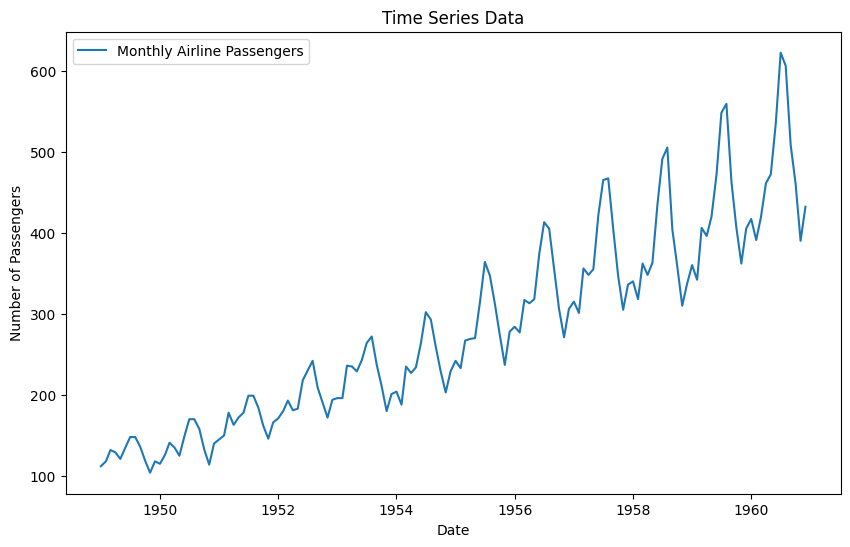

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data, label="Monthly Airline Passengers")
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [2]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (parameters: p=1, d=1, q=1)
model = ARIMA(data["Passengers"], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 09 Dec 2024   AIC                           1394.683
Time:                        02:32:53   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

In [3]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(data["Passengers"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpret the results
if result[1] > 0.05:
    print("The data is not stationary.")
else:
    print("The data is stationary.")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
The data is not stationary.


NameError: name 'data_diff' is not defined

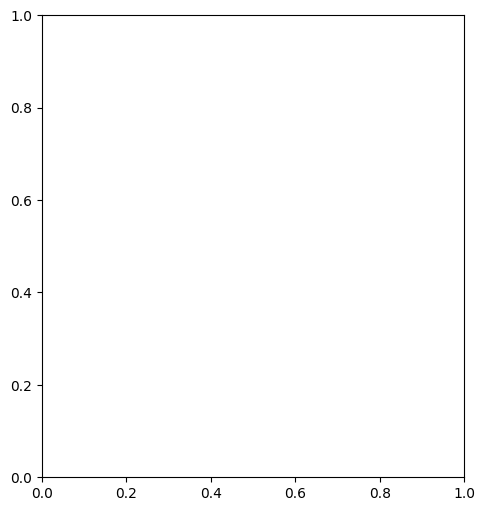

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for differenced data
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data_diff, lags=20, ax=plt.gca())
plt.title("Autocorrelation (ACF)")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data_diff, lags=20, ax=plt.gca())
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model with identified parameters (replace with your values)
p, d, q = 1, 1, 1
model = ARIMA(data["Passengers"], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 09 Dec 2024   AIC                           1394.683
Time:                        02:34:58   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

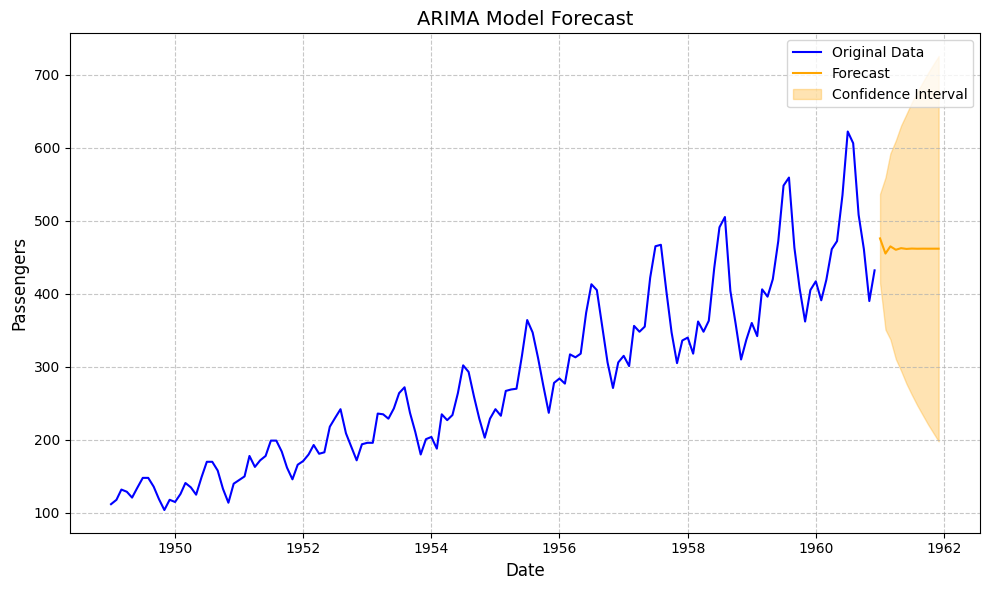

In [6]:
import matplotlib.pyplot as plt

# Forecast future values (e.g., next 12 months)
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract predicted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates for the forecast
last_date = data.index[-1]
forecast_index = pd.date_range(last_date, periods=forecast_steps + 1, freq="MS")[1:]

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label="Original Data", color="blue")
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
plt.fill_between(
    forecast_index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color="orange",
    alpha=0.3,
    label="Confidence Interval"
)
plt.title("ARIMA Model Forecast", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Passengers", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract actual values for the in-sample period
actual_values = data["Passengers"][-len(forecast_values):]  # Use corresponding actual values
predicted_values = forecast_values.values  # Predicted values from the ARIMA model

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 76.29


# Deploying the Forecasting Model: Build a Flask App

In [ ]:
# app.py
from flask import Flask, render_template, request
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import matplotlib
matplotlib.use('Agg')  # Use the Agg backend for rendering plots
import matplotlib.pyplot as plt

app = Flask(__name__)

# Load the ARIMA model
with open("arima_model.pkl", "rb") as f:
    model = pickle.load(f)

# Route for the home page
@app.route("/")
def index():
    return render_template("index.html")

# Route to handle forecasts
@app.route("/forecast", methods=["POST"])
def forecast():
    # Get user input (e.g., number of months to forecast)
    months = int(request.form.get("months", 12))

    # Generate forecast
    forecast = model.get_forecast(steps=months)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Generate future dates
    last_date = pd.Timestamp("1960-12-01")  # Replace with the actual last date of your dataset
    forecast_index = pd.date_range(last_date, periods=months + 1, freq="MS")[1:]

    # Plot the forecast using the Agg backend
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
    plt.fill_between(
        forecast_index,
        forecast_conf_int.iloc[:, 0],
        forecast_conf_int.iloc[:, 1],
        color="orange",
        alpha=0.3,
    )
    plt.title("ARIMA Forecast")
    plt.xlabel("Date")
    plt.ylabel("Predicted Values")
    plt.legend()

    # Save plot to a string buffer
    img = BytesIO()
    plt.savefig(img, format="png")
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()

    return render_template("forecast.html", plot_url=plot_url, months=months)

if __name__ == "__main__":
    app.run(debug=True)

# base.html
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ title | default("Forecast App") }}</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600&display=swap" rel="stylesheet">
</head>
<body>
    <header>
        <div class="container">
            <h1><a href="{{ url_for('index') }}">Forecast App</a></h1>
        </div>
    </header>
    <main>
        <div class="container">
            {% block content %}{% endblock %}
        </div>
    </main>
    <footer>
        <div class="container">
            <p>&copy; 2024 Forecast App</p>
        </div>
    </footer>
</body>
</html>
```

# index.html
```html
{% extends "base.html" %}
{% block content %}
<section class="form-section">
    <h2>Generate Your Forecast</h2>
    <p>Enter the number of months to forecast:</p>
    <form action="{{ url_for('forecast') }}" method="post" class="forecast-form">
        <label for="months">Months:</label>
        <input type="number" id="months" name="months" min="1" value="12" required>
        <button type="submit">Generate Forecast</button>
    </form>
</section>
{% endblock %}
```

# forecast.html
```html
{% extends "base.html" %}
{% block content %}
<section class="forecast-section">
    <h2>Forecast Results</h2>
    <p>You requested a forecast for the next <strong>{{ months }}</strong> months:</p>
    <div class="plot-container">
        <img src="data:image/png;base64,{{ plot_url }}" alt="Forecast Plot">
    </div>
    <a href="{{ url_for('index') }}" class="back-link">Back to Home</a>
</section>
{% endblock %}
```

# style.css
```css
body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 0;
    background: #f9f9f9;
}

header {
    background: #4CAF50;
    color: white;
    padding: 1em;
    text-align: center;
}

nav a {
    color: white;
    margin: 0 10px;
    text-decoration: none;
}

main {
    padding: 2em;
    text-align: center;
}

footer {
    background: #333;
    color: white;
    padding: 1em;
    text-align: center;
    position: fixed;
    bottom: 0;
    width: 100%;
}
```